# Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import folium
from sklearn.cluster import KMeans
from IPython.display import display

In [2]:
df = pd.read_csv('uber-raw-data-aug14.csv')

In [3]:
df.shape

(829275, 4)

In [4]:
df.head()

,Date/Time,Lat,Lon,Base
0,8/1/2014 0:03:00,40.7366,-73.9906,B02512
1,8/1/2014 0:09:00,40.7260,-73.9918,B02512
2,8/1/2014 0:12:00,40.7209,-74.0507,B02512
3,8/1/2014 0:12:00,40.7387,-73.9856,B02512
4,8/1/2014 0:12:00,40.7323,-74.0077,B02512


In [5]:
df['Date/Time'] = df['Date/Time'].map(pd.to_datetime)

In [6]:
def getHour(dt):
  return dt.hour
df['hour'] = df['Date/Time'].map(getHour)

In [7]:
df.describe()

,Lat,Lon,hour
count,829275.000000,829275.000000,829275.000000
mean,40.737781,-73.970160,14.058708
std,0.043628,0.061483,6.124801
min,39.656900,-74.773700,0.000000
25%,40.719000,-73.995800,9.000000
50%,40.740700,-73.982600,15.000000
75%,40.760500,-73.961200,19.000000
max,41.318200,-72.335900,23.000000


# Hour-wise frequency of rides

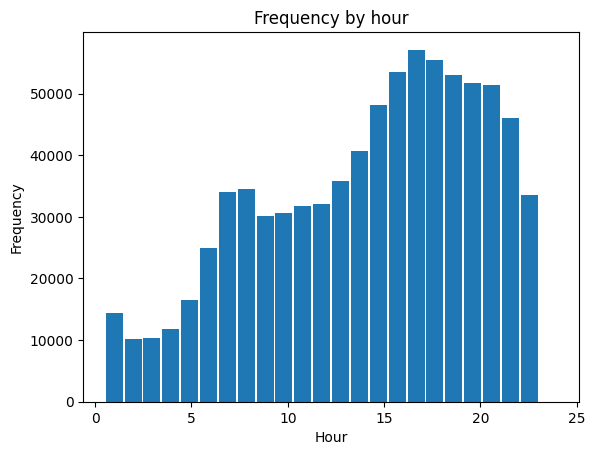

In [9]:
# Analyzing by hour in the data
plt.hist(df.hour,bins=24,range=(0.5,24) ,rwidth=.9)
plt.xlabel('Hour')
plt.ylabel('Frequency')
plt.title('Frequency by hour');

In [8]:
unique_hour = df.hour.unique()

Hour-wise dataframes

In [9]:
DataFrameDict = {elem : pd.DataFrame() for elem in unique_hour}

for key in DataFrameDict.keys():
    DataFrameDict[key] = df[:][df.hour == key]

In [23]:
distortions = []
clus = df[['Lat','Lon']]
K = range(1,15)
for k in K:
    kmeanModel = KMeans(n_clusters=k, max_iter=300, random_state=12345)
    kmeanModel.fit(clus)
    distortions.append(kmeanModel.inertia_)

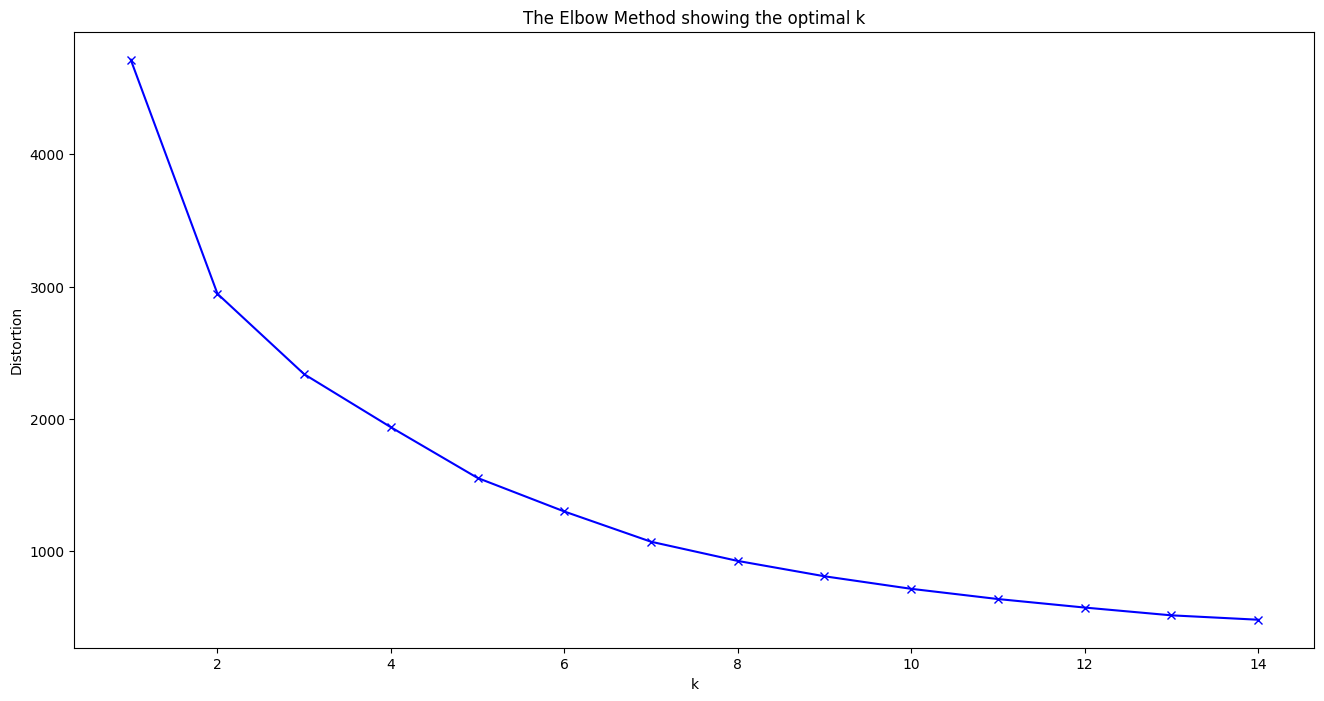

In [24]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

Optimal k = 6

k-means clustering on LAT,LON for all the entries of August

In [26]:
kmeans = KMeans(n_clusters=6, max_iter=300, random_state=12345)
kmeans.fit(clus)

KMeans(n_clusters=6, random_state=12345)

In [29]:
centroids = kmeans.cluster_centers_
clocation = pd.DataFrame(data = centroids, columns = ['Latitude', 'Longitude'])
print(clocation)
new_location = [(40.6556, -73.5631)]
print("New Location belongs to centre: " , kmeans.predict(new_location))

    Latitude  Longitude
0  40.767166 -73.971510
1  40.668068 -73.756441
2  40.686375 -73.962766
3  40.699951 -74.200727
4  40.730969 -73.997788
5  40.796892 -73.874339
New Location belongs to centre:  [1]


/home/btech/nityanand.mathur/anaconda3/envs/tf/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


Cluster Centers

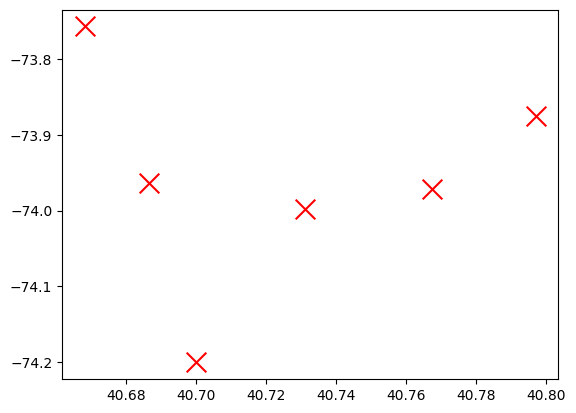

In [30]:
plt.scatter(clocation['Latitude'], clocation['Longitude'], marker = 'x', color = 'r', s=200)
plt.show()

In [32]:
centroids = clocation.values.tolist()
map = folium.Map(location=[40.79658011772687, -73.87341741832425], zoom_start = 25)
for point in range(0, len(centroids)):
    folium.Marker(centroids[point], popup = centroids[point]).add_to(map)
map

Training for each hour

In [16]:
import pickle

Hour:  0
    Latitude  Longitude
0  40.738314 -73.993185
1  40.693847 -73.752666
2  40.798069 -73.936748
3  40.692291 -73.958308
4  40.204335 -74.032306
5  40.722584 -74.220077
New Location belongs to centre:  [1]


/home/btech/nityanand.mathur/anaconda3/envs/tf/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


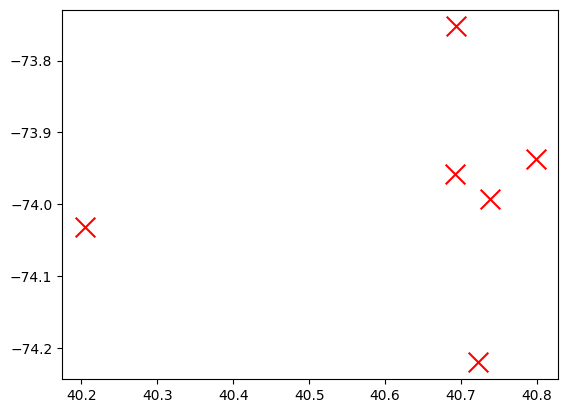

Hour:  1
    Latitude  Longitude
0  40.737817 -73.994018
1  40.695375 -73.953332
2  40.700347 -73.714444
3  40.798920 -73.935560
4  40.705172 -74.202152
5  40.171160 -74.050447
New Location belongs to centre:  [2]


/home/btech/nityanand.mathur/anaconda3/envs/tf/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


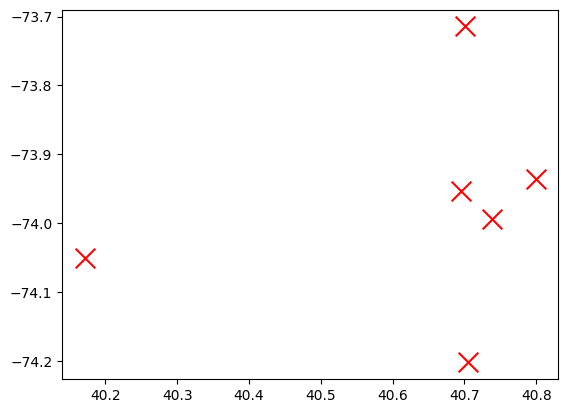

Hour:  2
    Latitude  Longitude
0  40.694086 -73.954681
1  40.801188 -73.933515
2  40.704658 -73.797446
3  40.738129 -73.994046
4  40.758673 -73.392254
5  40.733302 -74.241547
New Location belongs to centre:  [4]


/home/btech/nityanand.mathur/anaconda3/envs/tf/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


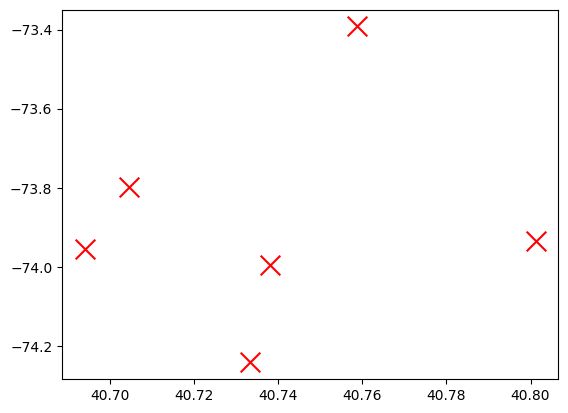

Hour:  3
    Latitude  Longitude
0  40.690367 -73.956812
1  40.771638 -73.960571
2  40.712192 -73.779286
3  40.725127 -74.230241
4  40.734668 -73.997095
5  40.853977 -73.921252
New Location belongs to centre:  [2]


/home/btech/nityanand.mathur/anaconda3/envs/tf/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


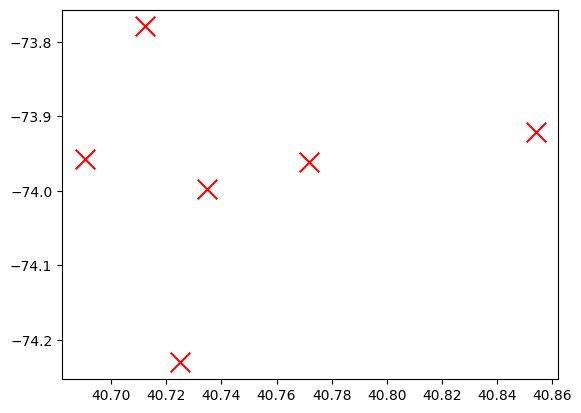

Hour:  4
    Latitude  Longitude
0  40.689589 -73.956485
1  40.738022 -73.993519
2  40.665275 -73.786752
3  40.701030 -74.192699
4  40.791378 -73.945344
5  40.769128 -73.506761
New Location belongs to centre:  [5]


/home/btech/nityanand.mathur/anaconda3/envs/tf/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


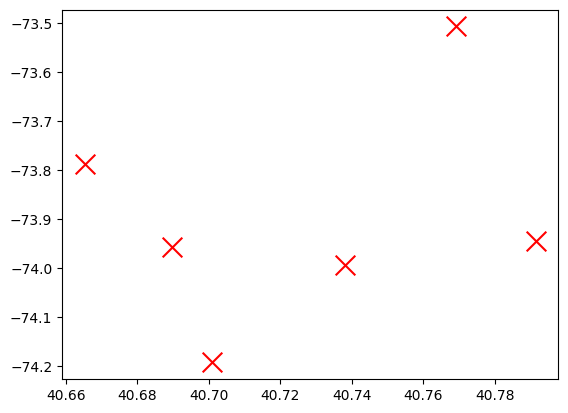

Hour:  5
    Latitude  Longitude
0  40.687935 -73.958353
1  40.732521 -73.995683
2  40.665114 -73.782312
3  40.774303 -73.959356
4  40.704014 -74.189420
5  40.873167 -73.899614
New Location belongs to centre:  [2]


/home/btech/nityanand.mathur/anaconda3/envs/tf/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


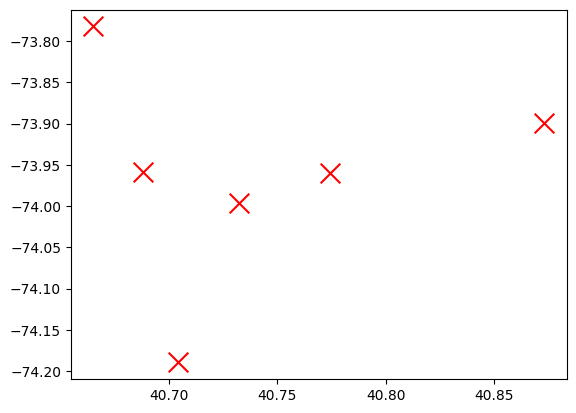

Hour:  6
    Latitude  Longitude
0  40.658881 -73.777551
1  40.688593 -73.962281
2  40.809283 -73.875456
3  40.775959 -73.964718
4  40.733643 -73.994268
5  40.709126 -74.192920
New Location belongs to centre:  [0]


/home/btech/nityanand.mathur/anaconda3/envs/tf/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


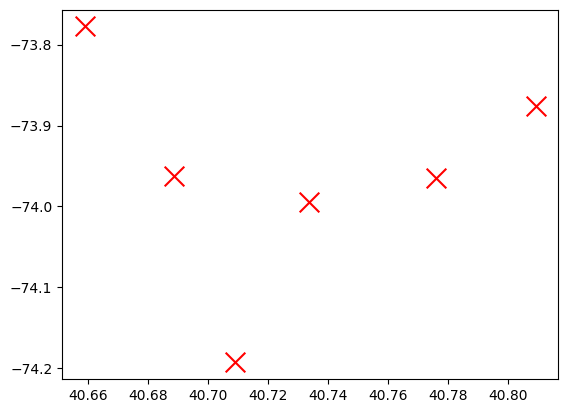

Hour:  7
    Latitude  Longitude
0  40.775585 -73.964989
1  40.795953 -73.870850
2  40.734714 -73.993545
3  40.668600 -73.761462
4  40.688406 -73.963211
5  40.708834 -74.199014
New Location belongs to centre:  [3]


/home/btech/nityanand.mathur/anaconda3/envs/tf/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


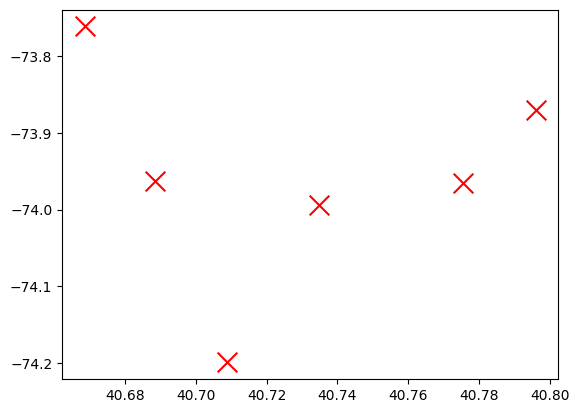

Hour:  8
    Latitude  Longitude
0  40.734463 -73.993783
1  40.686877 -73.963880
2  40.774961 -73.966274
3  40.694531 -74.203589
4  40.690216 -73.745786
5  40.790571 -73.870074
New Location belongs to centre:  [4]


/home/btech/nityanand.mathur/anaconda3/envs/tf/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


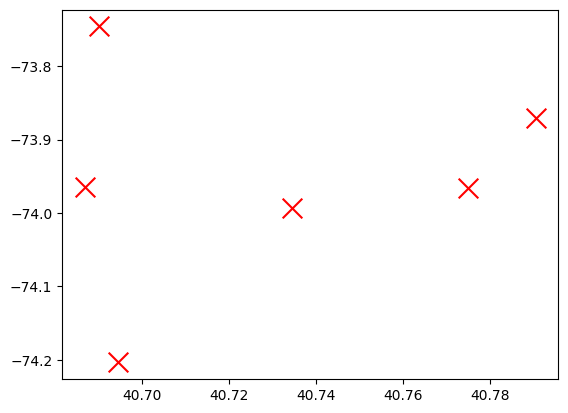

Hour:  9
    Latitude  Longitude
0  40.688454 -73.962884
1  40.792377 -73.868768
2  40.733830 -73.995063
3  40.712628 -74.202894
4  40.684212 -73.749312
5  40.773022 -73.966816
New Location belongs to centre:  [4]


/home/btech/nityanand.mathur/anaconda3/envs/tf/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


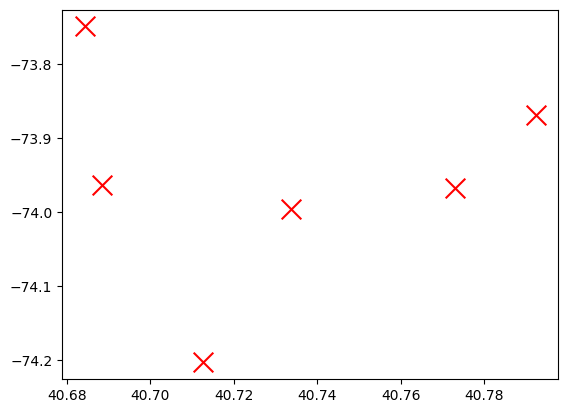

Hour:  10
    Latitude  Longitude
0  40.799947 -73.890656
1  40.707461 -73.984444
2  40.676997 -73.793806
3  40.801122 -73.520552
4  40.704411 -74.208942
5  40.760036 -73.978676
New Location belongs to centre:  [3]


/home/btech/nityanand.mathur/anaconda3/envs/tf/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


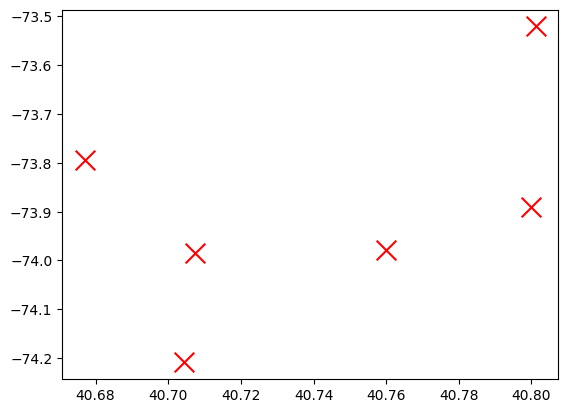

Hour:  11
    Latitude  Longitude
0  40.759993 -73.978750
1  40.810280 -73.886209
2  40.707323 -73.984894
3  40.682187 -73.784919
4  40.794580 -73.385547
5  40.698338 -74.198140
New Location belongs to centre:  [3]


/home/btech/nityanand.mathur/anaconda3/envs/tf/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


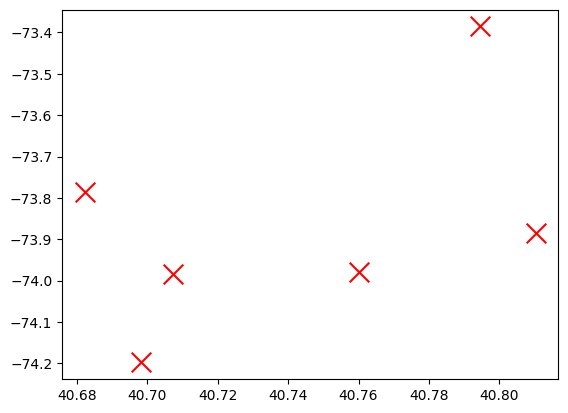

Hour:  12
    Latitude  Longitude
0  40.759027 -73.979150
1  40.809204 -73.888188
2  40.779117 -73.372771
3  40.671781 -73.779276
4  40.708499 -73.986195
5  40.692833 -74.206900
New Location belongs to centre:  [3]


/home/btech/nityanand.mathur/anaconda3/envs/tf/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


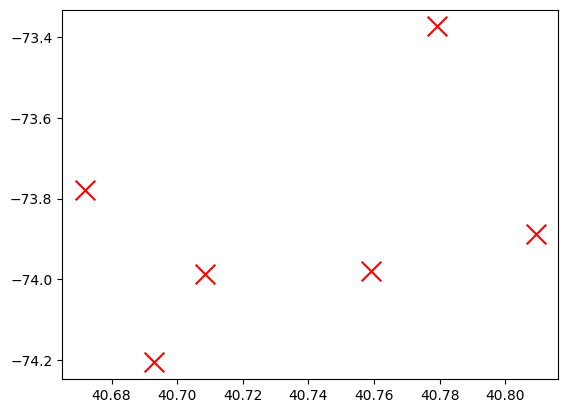

Hour:  13
    Latitude  Longitude
0  40.801161 -73.884388
1  40.707968 -73.987072
2  40.663788 -73.784582
3  40.779772 -73.473960
4  40.759193 -73.979711
5  40.687748 -74.196296
New Location belongs to centre:  [3]


/home/btech/nityanand.mathur/anaconda3/envs/tf/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


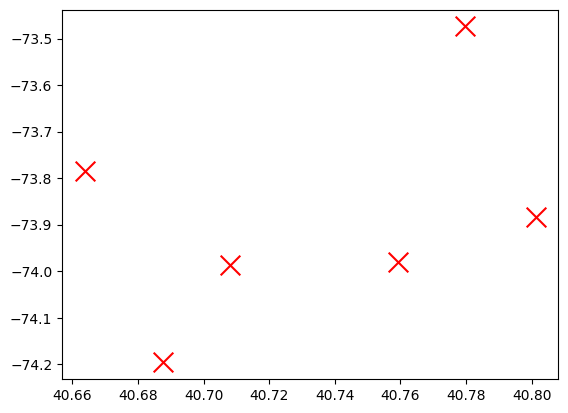

Hour:  14
    Latitude  Longitude
0  40.653298 -73.788325
1  40.758509 -73.980241
2  40.799399 -73.888064
3  40.815460 -73.582146
4  40.708503 -73.988474
5  40.692960 -74.207987
New Location belongs to centre:  [3]


/home/btech/nityanand.mathur/anaconda3/envs/tf/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


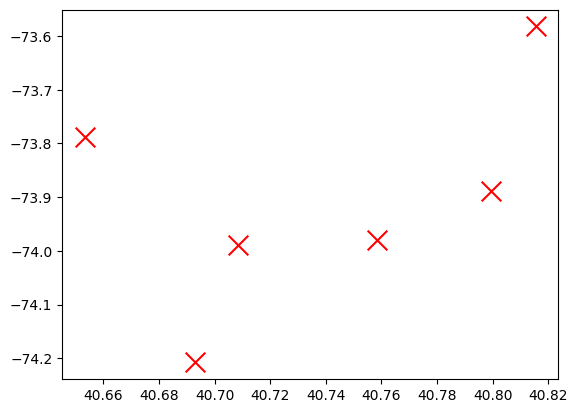

Hour:  15
    Latitude  Longitude
0  40.710127 -73.989560
1  40.799825 -73.882846
2  40.758402 -73.979880
3  40.659405 -73.785036
4  40.768842 -73.463713
5  40.700284 -74.192464
New Location belongs to centre:  [4]


/home/btech/nityanand.mathur/anaconda3/envs/tf/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


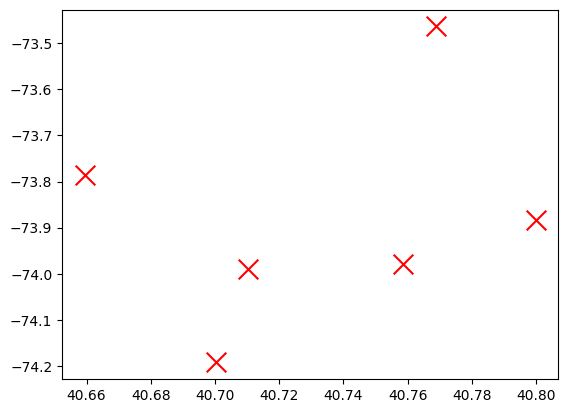

Hour:  16
    Latitude  Longitude
0  40.795342 -73.886850
1  40.709897 -73.990687
2  40.656693 -73.788414
3  40.757590 -73.980198
4  40.692127 -74.195071
5  40.829999 -73.540237
New Location belongs to centre:  [5]


/home/btech/nityanand.mathur/anaconda3/envs/tf/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


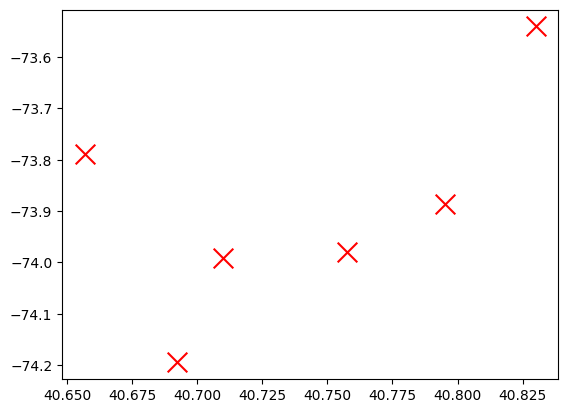

Hour:  17
    Latitude  Longitude
0  40.756990 -73.980732
1  40.666267 -73.778238
2  40.694209 -74.198241
3  40.771751 -73.387303
4  40.798673 -73.882816
5  40.708414 -73.989565
New Location belongs to centre:  [3]


/home/btech/nityanand.mathur/anaconda3/envs/tf/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


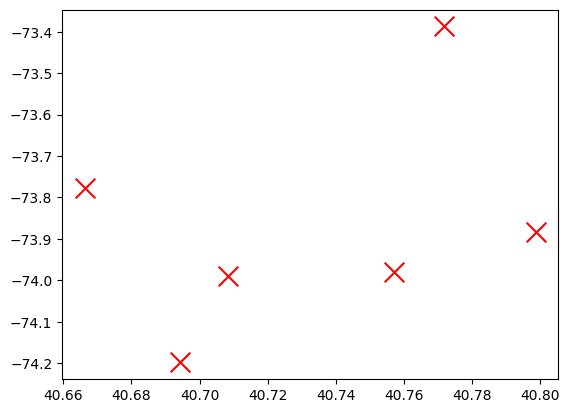

Hour:  18
    Latitude  Longitude
0  40.661938 -73.780149
1  40.757895 -73.980019
2  40.675756 -74.191928
3  40.791367 -73.883215
4  40.784249 -73.376383
5  40.710167 -73.988462
New Location belongs to centre:  [0]


/home/btech/nityanand.mathur/anaconda3/envs/tf/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


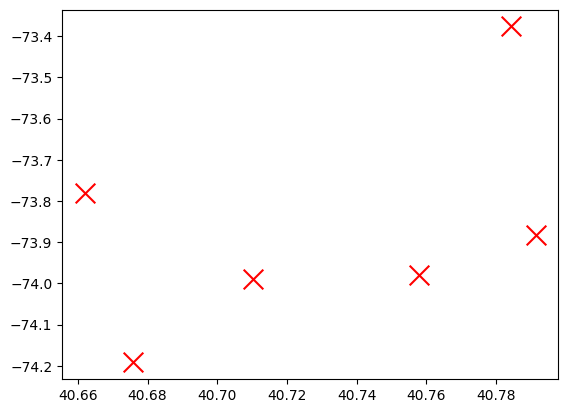

Hour:  19
    Latitude  Longitude
0  40.790697 -73.883834
1  40.710478 -73.988378
2  40.647688 -73.791160
3  40.757843 -73.980077
4  40.788234 -73.495709
5  40.695160 -74.195548
New Location belongs to centre:  [4]


/home/btech/nityanand.mathur/anaconda3/envs/tf/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


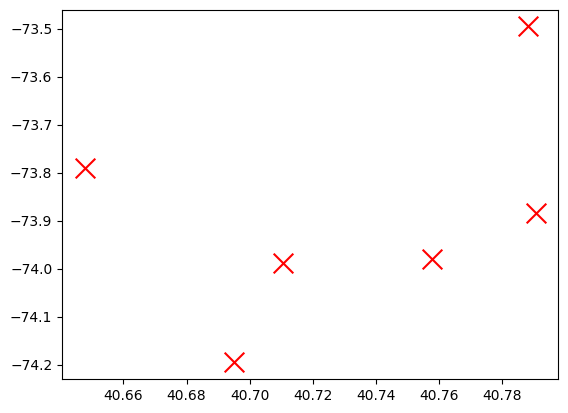

Hour:  20
    Latitude  Longitude
0  40.757723 -73.980952
1  40.709843 -73.987252
2  40.661074 -73.767811
3  40.706834 -74.195199
4  40.791198 -73.881155
5  40.176351 -74.049665
New Location belongs to centre:  [2]


/home/btech/nityanand.mathur/anaconda3/envs/tf/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


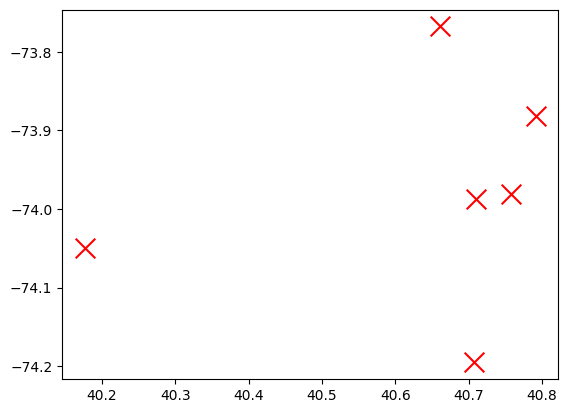

Hour:  21
    Latitude  Longitude
0  40.755307 -73.984604
1  40.708221 -73.985310
2  40.663067 -73.759094
3  40.791041 -73.884920
4  40.710257 -74.208361
5  40.195222 -74.042700
New Location belongs to centre:  [2]


/home/btech/nityanand.mathur/anaconda3/envs/tf/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


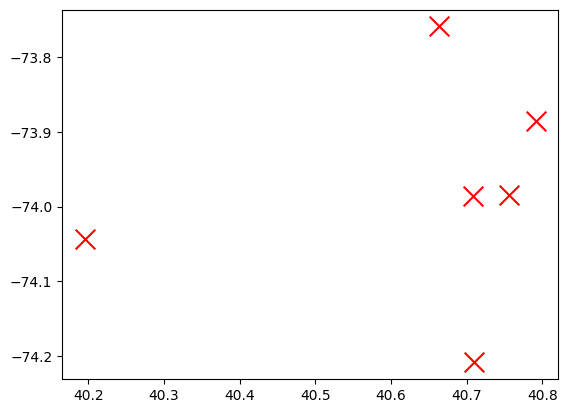

Hour:  22
    Latitude  Longitude
0  40.742430 -73.990575
1  40.703919 -74.199018
2  40.663333 -73.759180
3  40.791716 -73.898809
4  40.194187 -74.049729
5  40.689618 -73.963449
New Location belongs to centre:  [2]


/home/btech/nityanand.mathur/anaconda3/envs/tf/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


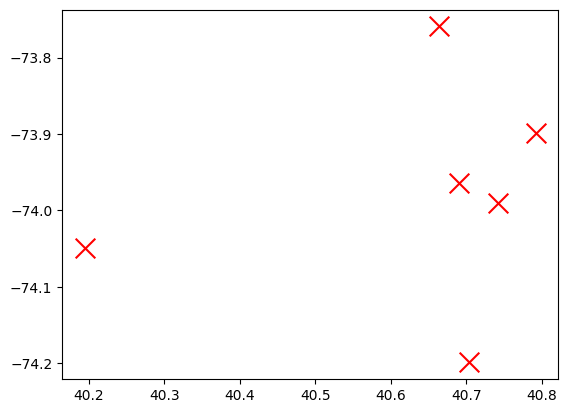

Hour:  23
    Latitude  Longitude
0  40.797927 -73.918405
1  40.691390 -73.961646
2  40.714731 -74.204383
3  40.666213 -73.762955
4  40.739622 -73.992258
5  40.181606 -74.038851
New Location belongs to centre:  [3]


/home/btech/nityanand.mathur/anaconda3/envs/tf/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


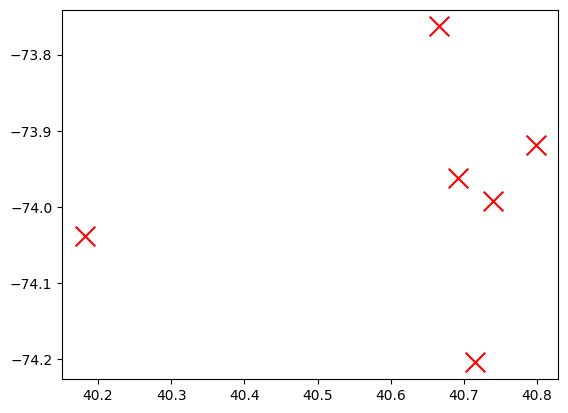

In [17]:
for key in DataFrameDict.keys():
    clus = DataFrameDict[key][['Lat','Lon']]
    kmeans = KMeans(n_clusters=6, max_iter=300, random_state=12345)
    kmeans.fit(clus)
    print("Hour: ", key)
    centroids = kmeans.cluster_centers_
    clocation = pd.DataFrame(data = centroids, columns = ['Latitude', 'Longitude'])
    print(clocation)
    new_location = [(40.6556, -73.5631)]
    print("New Location belongs to centre: " , kmeans.predict(new_location))
    plt.scatter(clocation['Latitude'], clocation['Longitude'], marker = 'x', color = 'r', s=200)
    plt.show()
    name = 'model' + str(key) + '.pkl'
    pickle.dump(kmeans, open(name, 'wb'))
    